<a href="https://colab.research.google.com/github/jiansim03/colab/blob/main/scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 스케일이 다른 데이터를 전처리하는 법에 대해 학습해보자

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
fish_data=np.column_stack((fish_length,fish_weight))

In [ ]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [ ]:
# fish의 타겟데이터 만들자 - numpy의 zeros, ones 함수 이용해서!
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 사이킷런으로 훈련세트와 테스트세트 나누기
**train_test_split** :
 - 전달되는 리스트나 배열을 비율에 맞게 훈련세트/테스트세트로 나눠준다.
 - 랜덤하게 섞어주기도 한다


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [ ]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

In [ ]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### stratify
- train_test_split의 메서드  
- 데이터 샘플 비율이 다를 경우 훈련/테스트 세트 나눌 때 샘플링 편향이 나타나기 쉬운데
- 이 메서드를 사용할 경우 원래 세트에서 비율대로 나눠진다.

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, stratify=fish_target)

In [ ]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

### k-최근접이웃

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 학습모델의 정확도

1.0

In [ ]:
# 다른 아주 큰 도미 데이터를 넣고 예측해보자
# 결과 : 빙어(0)로 예측한다
kn.predict([[25,150]])

array([0.])

In [ ]:
train_input[0,:]

array([ 29.7, 500. ])

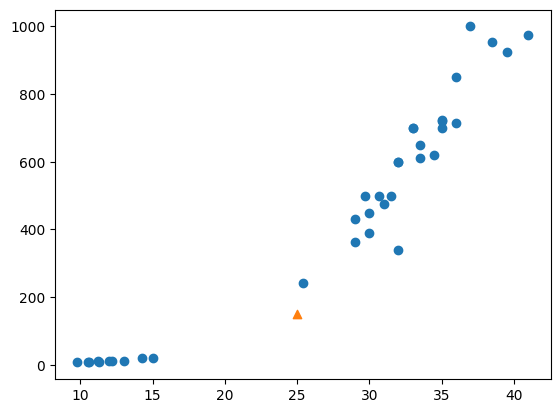

In [ ]:
# 산점도로 데이터를 확인해보자
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) # (길이,무게)
plt.scatter(25,150, marker='^')
plt.xlabel='length'
plt.ylabel='weight'
plt.show()


### kneighnor() 메서드
- 이웃까지의 거리와 이웃 샘플 인덱스 반환
- 기본값 5개

In [ ]:
distances, indexes = kn.kneighbors([[25,150]])
distances, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]]))

TypeError: ignored

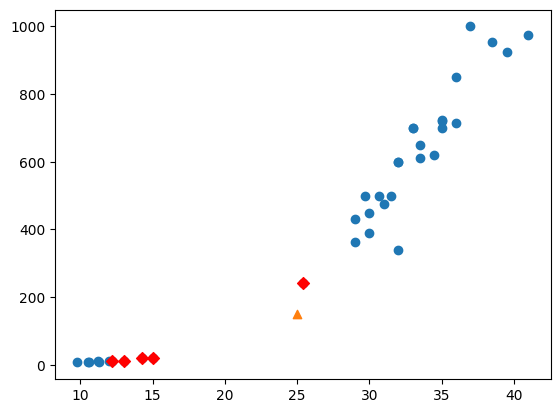

In [ ]:
# indexes 배열 이용해서 이웃샘풀 따로 구분해 그려보자
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1]) # # 일반 도미들
plt.scatter(25,150, marker='^') # 수상한 도미
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D', c='r') # 수상한 도미의 이웃 데이터

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 직접 수상한 도미의 이웃들을 확인해보자
train_input[indexes]

In [ ]:
distances # 수상한도미와 이웃샘플까지의 거리를 반환한다
# 결과 : x축 (길이)의거리가 길어보임에도 그래프가 그것을 충분히 반영하지 못한다

In [ ]:
# 명확히 확인하기 위해 length의 범위를 맞춰준다
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlim(0,1000) # xlim() : y축과 비슷하게 x축의 범위를 지정해주는 메서드
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 두 피쳐의 스케일을 맞춰주자
- 각 데이터에 평균을 빼고 표준편차를 나누어준다
- 피쳐마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성 별로 계산해야함
- numpy의 bradcasting : 넘파이 배열에 한해 어떤 연산을 각각의 원소에 수행해준다

In [ ]:
mean = np.mean(train_input, axis=0) # axis=0 :각 행을 따라 통계값을 계산한다
std = np.std(train_input, axis=0)

In [ ]:
mean, std

(array([ 27.29722222, 454.09722222]), array([  9.98244253, 323.29893931]))

In [ ]:
train_scaled = (train_input - mean)/std # 브로드캐스팅

AttributeError: ignored

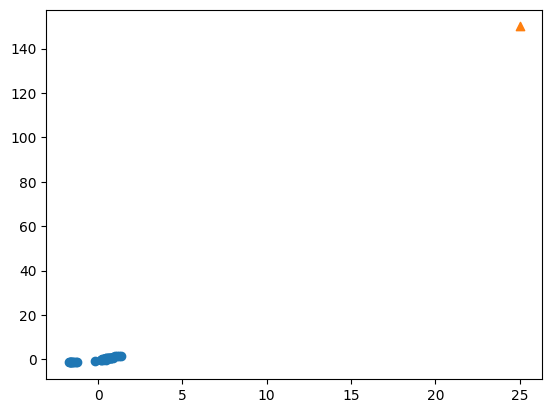

In [ ]:
# # 스케일링한 데이터를 산점도로 그려보자
# plt.scatter(train_scaled[:,0],train_scaled[:,1]) # 스케일링된 전체 데이터
# plt.scatter(25,150, marker="^") # 수상한 도미
# plt.xlable('length')
# plt.ylable('weight')
# plt.show()


AttributeError: ignored

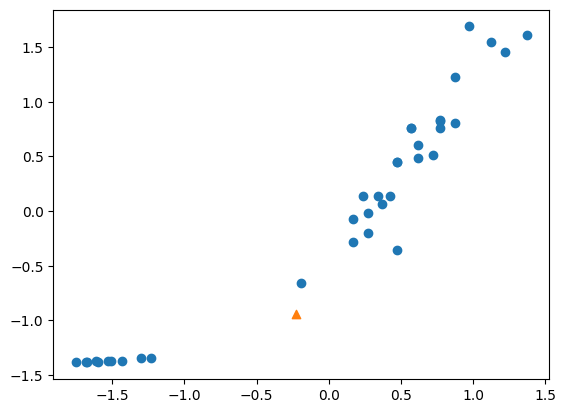

In [ ]:
# 수상한 도미도 스케일링하여 산점도로 그려보자
new_bream=([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1]) # 스케일링된 전체 데이터
plt.scatter(new_bream[0],new_bream[1], marker="^") # 수상한 도미
plt.xlable('length')
plt.ylable('weight')
plt.show()


array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [ ]:
# 전처리한 데이터로 다시 훈련시켜보자
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
# 검증 데이터도 전처리 후 테스트해보자
test_scaled = (test_input - mean) / std

In [ ]:
# 잘 맞히는지 평가해보자
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 수상한 도미도 잘 맞히는지 모델에 넣어보자
# 도미(1) 이 나오면 성공
kn.predict([new_bream])

array([1.])

TypeError: ignored

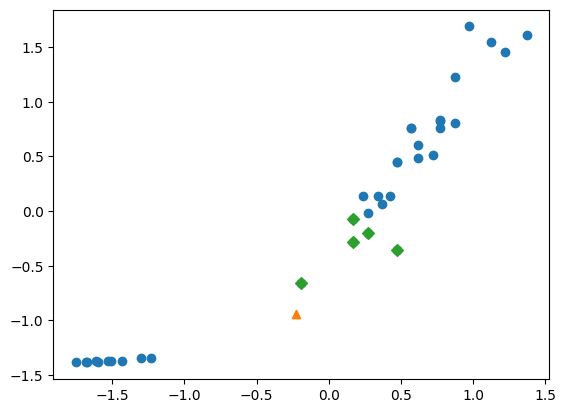

In [ ]:
# kneighbors() 함수로 수상한 도미의 이웃을 구하여 산점도로 그려보자
# 스케일링 해주었으므로 제일 가까운 이웃을 잘 인식할 것이다

distances, indexes = kn.kneighbors([new_bream]) # 수상한도미의 이웃의 거리와 인덱스값 구한다
plt.scatter(train_scaled[:,0],train_scaled[:,1]) # 전체 생선 데이터
plt.scatter(new_bream[0],new_bream[1], marker='^') # 수상한 도미
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker="D") # 수상한 도미의 이웃
plt.xlabel('length')
plt.ylabel('weight')
plt.show()